<a href="https://colab.research.google.com/github/jhwangt/UMBCds601Fall2020Prj2/blob/main/Shiva_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from io import StringIO

In [ ]:

1
#Test the code for one file
2
#Read CSV from google drive : 
3
# https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
4
orig_url='https://drive.google.com/file/d/1VryNHYq8Irf3N8efgA9N44tDyXSqnqfG/view?usp=sharing'
5
file_id = orig_url.split('/')[-2]
6
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
7
url = requests.get(dwn_url).text
8
csv_raw = StringIO(url)
9
dfs = pd.read_csv(csv_raw,low_memory=False)
10
dfs.shape


(68919, 11)

In [ ]:
# Function retruns data frame Pass google drive CSV File, and this will give the dataframe for that year
def getCSVdatagoogleDrvie(urlString):
    orig_url=urlString
    file_id = orig_url.split('/')[-2]
    dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(dwn_url).text
    csv_raw = StringIO(url)
    dfs = pd.read_csv(csv_raw,low_memory=False, thousands=',')
    return dfs     

In [ ]:
#get H1b approval for all the years
dfH1b2009=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1VryNHYq8Irf3N8efgA9N44tDyXSqnqfG/view?usp=sharing')
dfH1b2010=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1a50j2a2hqmQOWE_NV2lQWwI4B6Ja4nFZ/view?usp=sharing')
dfH1b2011=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1pzj_rXKWiGU3_ZPh0pHdS6o_4oFUimNg/view?usp=sharing')
dfH1b2012=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1WU1DC_4Tu_dADJDpnCiilhpmyN2DPJ9j/view?usp=sharing')
dfH1b2013=getCSVdatagoogleDrvie('https://drive.google.com/file/d/16XLS0TnPmVdGEVqEVtMxlgYca2EQe6ze/view?usp=sharing')
dfH1b2014=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1i2iigYUf7YjcYpHemIe6FpcLw3T38h76/view?usp=sharing')
dfH1b2015=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1U7UKhKBZ-X8E_MwZ8acKvisOMUm6YuIG/view?usp=sharing')
dfH1b2016=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1iKZBVjFuanK7tlaF97CZEr6qtNj6vVz6/view?usp=sharing')
dfH1b2017=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1kcSAIEgHFBWyoazPYZuSdvIHwbEMVM1q/view?usp=sharing')
dfH1b2018=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1W3rvpHcoB705lk_iO0_jxFu7AZCJiEZz/view?usp=sharing')
dfH1b2019=getCSVdatagoogleDrvie('https://drive.google.com/file/d/1DRM0sYK5_EkuxJSlyYdrxZrP8zIzQaTs/view?usp=sharing')

In [ ]:
#Find sum of Initial approvals versus the Continuing Approvals
#give trouble comma was coming as object

temp1 = dfH1b2011[['Fiscal Year','Initial Approvals', 'Continuing Approvals']]
#Total = dfH1b2011['Initial Approvals'].sum()
#Totalz = dfH1b2011['Initial Denials'].sum()
#print (Totalz)

In [ ]:
#Combine all the dataframe
data_frameszz = pd.concat([dfH1b2019,dfH1b2018,dfH1b2017,dfH1b2016,dfH1b2015,
                           dfH1b2014,dfH1b2013,dfH1b2012,dfH1b2011
                          ,dfH1b2010,dfH1b2009],ignore_index=True)
data_frameszz
temp1 = data_frameszz[['Fiscal Year','Initial Approvals', 'Continuing Approvals']]

In [ ]:
CountOfH1bVisa= temp1.groupby("Fiscal Year")['Initial Approvals','Continuing Approvals'].sum()
CountOfH1bVisa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Initial Approvals,Continuing Approvals
Fiscal Year,,
2009,99790,127687
2010,84038,108935
2011,114863,155186
2012,140809,129023
2013,130736,164538
2014,130616,202190
2015,111846,176656
2016,105092,252120
2017,96166,277229


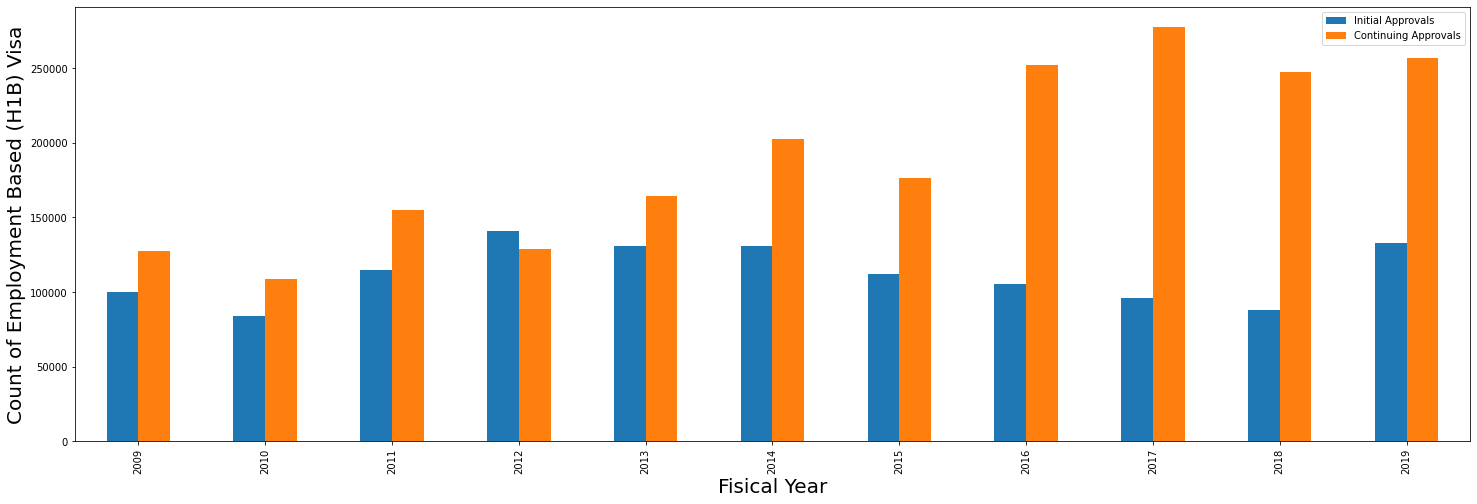

In [ ]:
import matplotlib.pyplot as plt
_ = CountOfH1bVisa.plot.bar()
fig=plt.gcf()
fig.set_size_inches(25,8)
_=plt.ylabel('Count of Employment Based (H1B) Visa',fontsize=20)
_=plt.xlabel('Fisical Year',fontsize=20)